# TRAINING THE NETWORK

Let us train the Multi-layer perceptron on real-world data: The MNIST dataset is a very widely used base of
handwritten digits images to benchmark machine learning models and image processing systems. The purpose here
is not to fine-tune the model to achieve a certain degree of performance but simply to make sure it works as expected.

In [11]:
import sys

from NeuralNetwork.network import MultiLayerPerceptron
from NeuralNetwork.optimizer import *

In [12]:
mlp = MultiLayerPerceptron([Layer(64), Layer(64, 'relu'), Layer(10, 'softmax')])
optimizer = SGD(learning_rate=0.001)
mlp.he_init()

___
## LOADING THE DATA

Let us use a simplified sample of the actual MNIST database. It consists of 1797 instances picked among the 70K ones
from the original dataset, dimensionality is reduced to 8x8 (instead of 28x28) which makes a total of 64 inputs. We use Scikit-Learn to load the data and split it into training and testing sets.

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

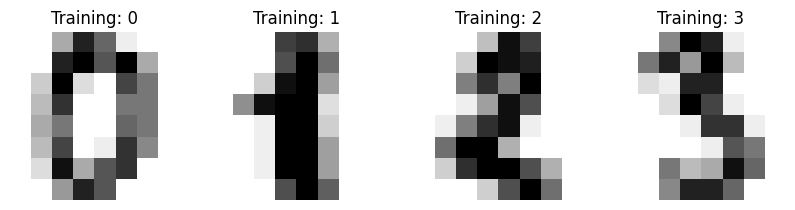

In [14]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Example of digits from the training set.

In [15]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

Remember the labels must be one-hot encoded for the comparison with model's predictions to be accurate otherwise it won't simply learn anything (original labels are scalar values and must be converted).

In [16]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()

y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

Now we can train the neural network:

In [17]:
from tqdm import tqdm

epochs = 50
loss_values = []
for i in tqdm(range(epochs)):
    loss = 0.0
    for X, y in zip(X_train, y_train_one_hot):
        mlp.forward(X)
        loss += cross_entropy(mlp.layers[-1].get_output(), y)
        grads_w, grads_b = mlp.backward(y)
        optimizer.step(mlp.layers, grads_w, grads_b)
    loss /= len(X_train)
    #print('Epoch ', i, ' - Average loss = ', loss)
    loss_values.append(loss)

100%|██████████| 50/50 [00:57<00:00,  1.15s/it]


And visualize the learning curve. It appears the model is learning correctly. The network is probably overfitting at this point, however this validates the implementation.

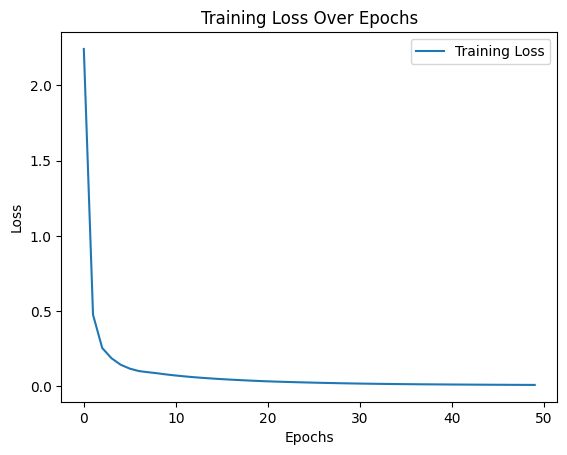

In [18]:
import matplotlib.pyplot as plt

def plot_curve(loss_val):
    plt.plot(loss_val, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()

    plt.show()

plot_curve(loss_values)

In [20]:
correct_predictions = 0
for n in range(len(X_test)):
    mlp.forward(X_test[n])
    if np.argmax(softmax(mlp.layers[-1].get_output())) == y_test[n]:
        correct_predictions += 1
accuracy = (correct_predictions / len(X_test)) * 100
print(f"The neural network has an accuracy of: {round(accuracy)}%")


The neural network has an accuracy of: 91%
